In [2]:
! pip install yfinance

     ---------------------------------------- 59.2/59.2 kB 1.6 MB/s eta 0:00:00
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
     -------------------------------------- 499.4/499.4 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.


In [16]:
import yfinance as yf

# extract stock data for Tesla from Yahoo Finance
tesla_data = yf.download("TSLA", start="2020-01-01", end="2022-02-27")

# reset the index
tesla_data = tesla_data.reset_index()

# save the data to a CSV file
tesla_data.to_csv("tesla_data.csv", index=False)

# display the first five rows of the dataframe
tesla_data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,28.299999,28.713333,28.114000,28.684000,28.684000,142981500
1,2020-01-03,29.366667,30.266666,29.128000,29.534000,29.534000,266677500
2,2020-01-06,29.364668,30.104000,29.333332,30.102667,30.102667,151995000
3,2020-01-07,30.760000,31.441999,30.224001,31.270666,31.270666,268231500
4,2020-01-08,31.580000,33.232666,31.215334,32.809334,32.809334,467164500


In [14]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define the URL and send a request to get the HTML content
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
html_content = requests.get(url).text

# Use BeautifulSoup to parse the HTML content and extract the table
soup = BeautifulSoup(html_content, "lxml")
table = soup.find_all('table')[1]

# Convert the HTML table to a pandas dataframe
tesla_revenue = pd.read_html(str(table))[0]

# Display the last five rows of the dataframe using the tail function
tesla_revenue.tail(5)


,Tesla Quarterly Revenue(Millions of US $),Tesla Quarterly Revenue(Millions of US $).1
50,2010-06-30,$28
51,2010-03-31,$21
52,2009-12-31,NaN
53,2009-09-30,$46
54,2009-06-30,$27


In [17]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker("GME")

# Get the historical stock price data for GameStop
gme_data = gme.history(period="max")

# Reset the index of the dataframe
gme_data = gme_data.reset_index()

# Save the dataframe to a CSV file
gme_data.to_csv("gme_data.csv", index=False)

# Display the first five rows of the dataframe
gme_data.head(5)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [19]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define the URL to scrape
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send a GET request to the URL and store the response
html_content = requests.get(url).text

# Create a BeautifulSoup object from the HTML content
soup = BeautifulSoup(html_content, "lxml")

# Find the revenue table on the page and convert it to a pandas dataframe
table = soup.find_all('table')[1]
gme_revenue = pd.read_html(str(table))[0]

# Display the last five rows of the dataframe
gme_revenue.tail(5)


,GameStop Quarterly Revenue(Millions of US $),GameStop Quarterly Revenue(Millions of US $).1
51,2010-01-31,"$3,524"
52,2009-10-31,"$1,835"
53,2009-07-31,"$1,739"
54,2009-04-30,"$1,981"
55,2009-01-31,"$3,492"


In [20]:
import matplotlib.pyplot as plt

def make_graph(dataframe, title):
    plt.figure(figsize=(12,6))
    plt.plot(dataframe['Date'], dataframe['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.show()

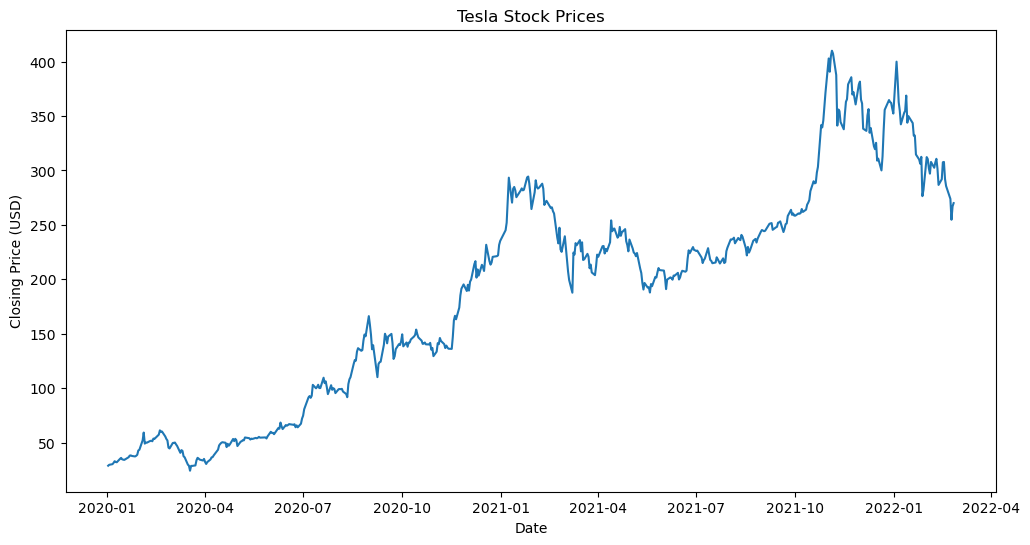

In [22]:
make_graph(tesla_data,'Tesla Stock Prices')

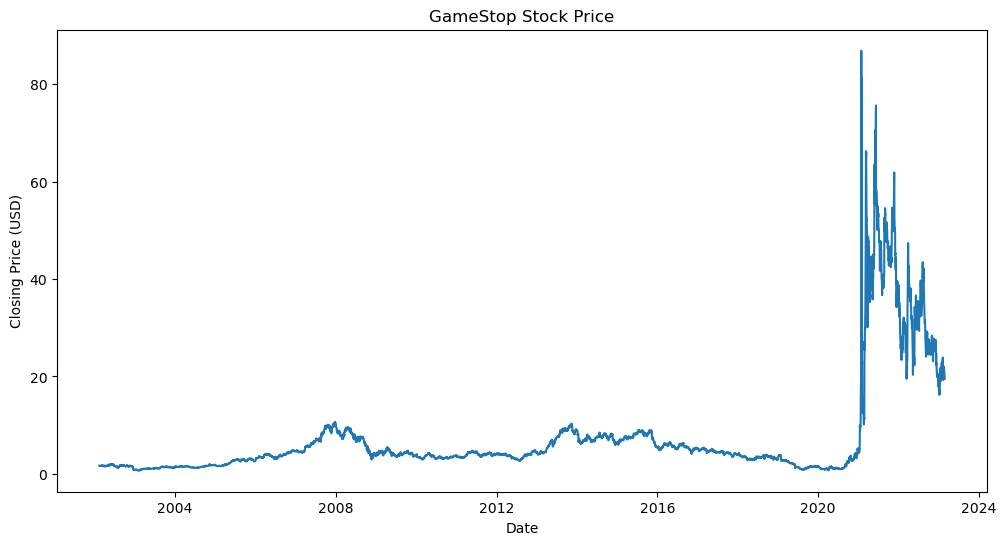

In [23]:
make_graph(gme_data, 'GameStop Stock Price')